# Import libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib.pyplot as plt
# plt.style.use('seaborn')

In [92]:
# Import file
data = pd.read_csv('medical_examination.csv', index_col='id')
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Task 1

Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

In [93]:
def calc_overweight(df):
    '''
    A simple function to caclulate BMI
    '''
    df['overweight'] = (df['weight'] / ((df['height']/100) ** 2)).to_numpy()
    df['overweight'] = np.where(df['overweight'] < 25, 0, 1)

    # Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol         or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
    df['cholesterol'] = np.where(df['cholesterol'] <= 1, 0, 1)
    df['gluc'] = np.where(df['gluc'] <= 1, 0, 1)
    return df


In [94]:
data1 = data.copy()

In [95]:
test = calc_overweight(data1)
test.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
8,21914,1,151,67.0,120,80,1,1,0,0,0,0,1
9,22113,1,157,93.0,130,80,1,0,0,0,1,0,1
12,22584,2,178,95.0,130,90,1,1,0,0,1,1,1
13,17668,1,158,71.0,110,70,0,0,0,0,1,0,1


In [96]:
data2 = test.iloc[:,6:].copy()
data2.head()

,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,
0,0,0,0,0,1,0,0
1,1,0,0,0,1,1,1
2,1,0,0,0,0,1,0
3,0,0,0,0,1,1,1
4,0,0,0,0,0,0,0


In [98]:
data3 = pd.melt(data2,id_vars='cardio', var_name='metrics', value_name='values')

In [99]:
data3.head()

,cardio,metrics,values
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [113]:
data4 = pd.DataFrame(data3.value_counts()).reset_index()
data4

,cardio,metrics,values,0
0,1,alco,0,33156
1,0,alco,0,33080
2,1,smoke,0,32050
3,0,smoke,0,31781
4,0,gluc,0,30894
5,0,cholesterol,0,29330
6,0,active,1,28643
7,1,gluc,0,28585
8,1,active,1,27618
9,1,overweight,1,24447


In [102]:
test1 = data3.groupby(['cardio']).sum()
test1

,values
cardio,
0,62755
1,75135


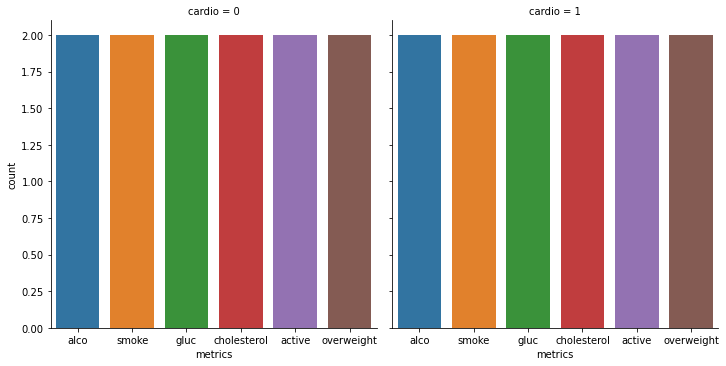

In [114]:
sns.catplot(x='metrics',data=data4, kind='count', col='cardio')